In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# إعدادات التصميم للرسومات (لجعلها أوضح وأجمل)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("تم استيراد المكتبات بنجاح!")

تم استيراد المكتبات بنجاح!


In [2]:
# قراءة ملف البيانات
try:
    df = pd.read_csv('Morocco_Student_Data_Pool.csv')
    print("✅ تم تحميل البيانات بنجاح.")
except FileNotFoundError:
    print("❌ الملف غير موجود. تأكد من وضع ملف CSV في نفس المجلد.")

# عرض نظرة عامة سريعة
print(f"أبعاد البيانات: {df.shape}") # عدد الأسطر والأعمدة
display(df.head()) # عرض أول 5 أسطر

✅ تم تحميل البيانات بنجاح.
أبعاد البيانات: (10000, 286)


C:\Users\pc\AppData\Local\Temp\ipykernel_16520\1214356677.py:3: DtypeWarning: Columns (27,151) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Morocco_Student_Data_Pool.csv')


,id_etudiant,prenom,nom,nom_complet,sexe,date_naissance,age,code_massar,region,province,...,francais_maison,performance_cible,probabilite_reussite,niveau_risque,intervention_necessaire,date_collecte,id_collecteur,statut_verification,date_mise_a_jour,remarques
0,STU00001,Soumia,Chraibi,Soumia Chraibi,F,2007-05-05,19,G548679848,Fes-Meknes,El Hajeb,...,Tres Eleve,0.54,Moyen,Oui,2026-01-15,COL008,Verifie,2026-01-20,NaN,NaN
1,STU00002,Mehdi,Tazi,Mehdi Tazi,M,2009-10-12,17,G478451439,Souss-Massa,Inezgane,...,Eleve,0.08,Eleve,Oui,2026-01-15,COL005,Verifie,2026-01-20,NaN,NaN
2,STU00003,Bilal,Lahbabi,Bilal Lahbabi,M,2008-08-08,18,G727518594,Casablanca-Settat,Berrechid,...,Tres Eleve,0.47,Eleve,Oui,2026-01-15,COL001,Verifie,2026-01-20,NaN,NaN
3,STU00004,Hakim,Chraibi,Hakim Chraibi,M,2009-10-05,17,G868905524,Tanger-Tetouan-Al Hoceima,Larache,...,Eleve,0.55,Moyen,Oui,2026-01-15,COL008,Verifie,2026-01-20,NaN,NaN
4,STU00005,Ayoub,Lahbabi,Ayoub Lahbabi,M,2007-05-27,19,G809425460,Casablanca-Settat,El Jadida,...,Eleve,0.15,Eleve,Oui,2026-01-15,COL004,Verifie,2026-01-20,NaN,NaN


In [3]:
# معلومات عن الأعمدة وأنواعها
print("--- معلومات البيانات ---")
df.info()

# التحقق من القيم المفقودة (Missing Values)
print("\n--- مجموع القيم المفقودة لكل عمود (أكثر 10 أعمدة) ---")
print(df.isnull().sum().sort_values(ascending=False).head(10))

--- معلومات البيانات ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 286 entries, id_etudiant to remarques
dtypes: float64(65), int64(48), object(173)
memory usage: 21.8+ MB

--- مجموع القيم المفقودة لكل عمود (أكثر 10 أعمدة) ---
mention_bac              10000
note_finale_bac          10000
note_controle_continu    10000
note_examen_national     10000
note_examen_regional     10000
date_mise_a_jour         10000
gestion_s1               10000
comptabilite_annuel      10000
economie_s1              10000
type_handicap            10000
dtype: int64


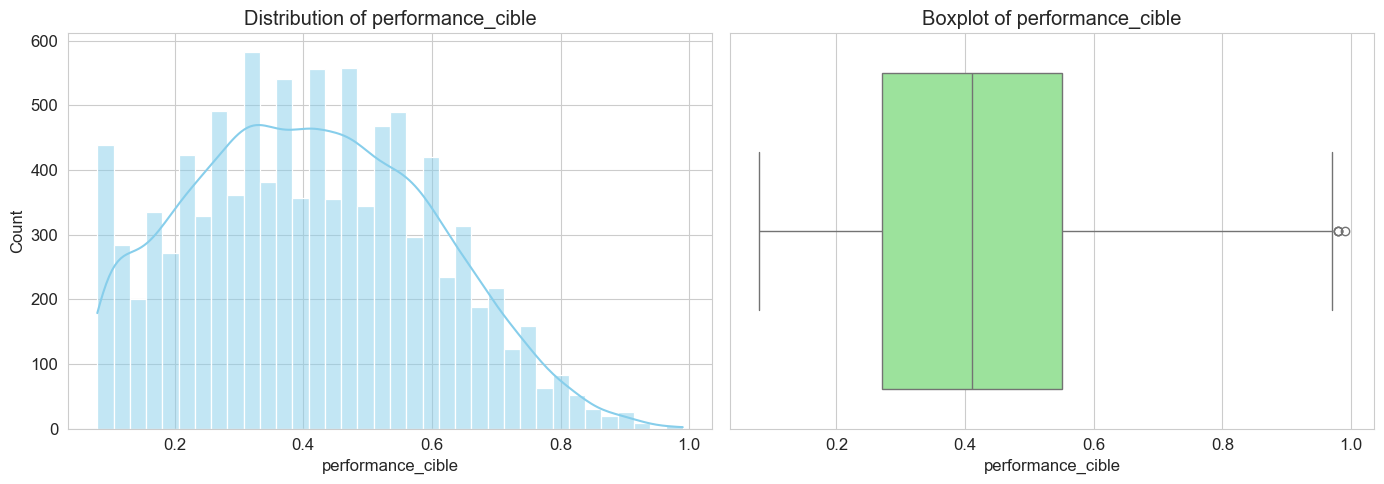

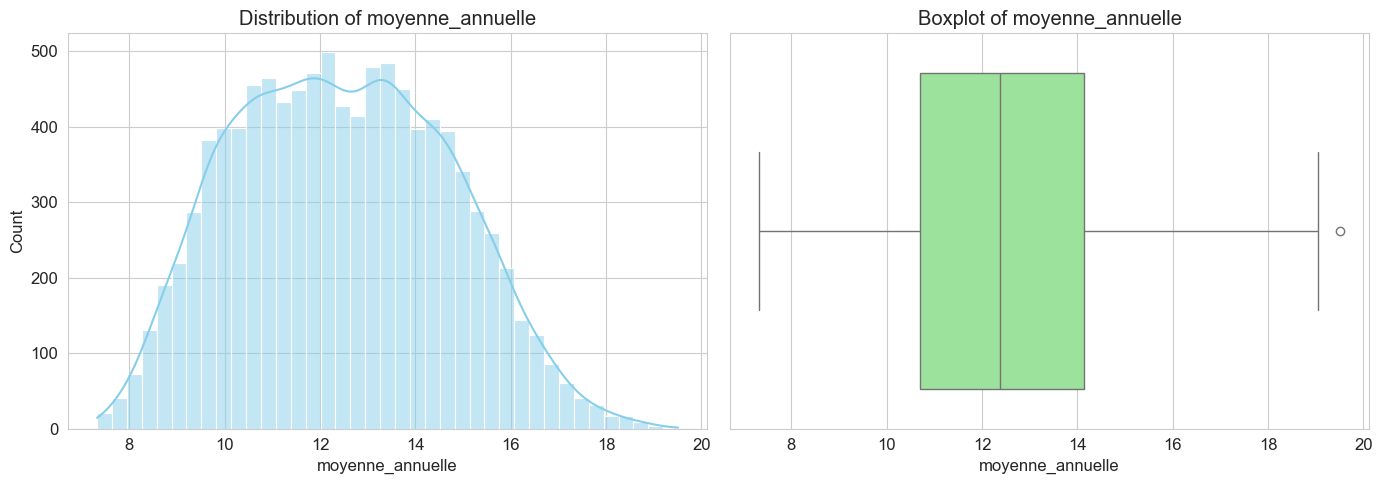

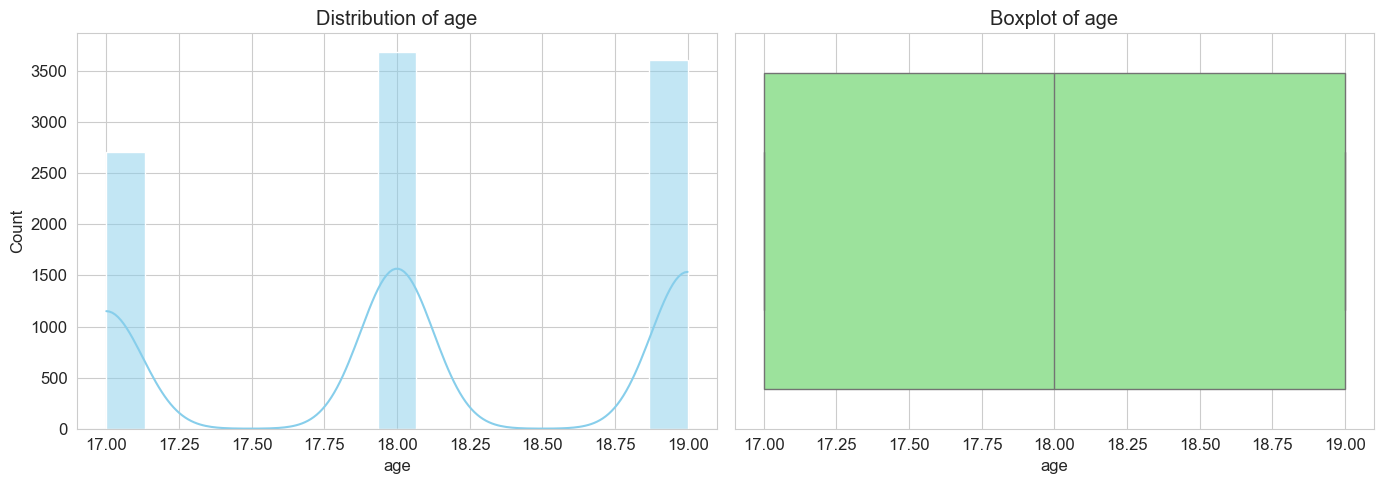

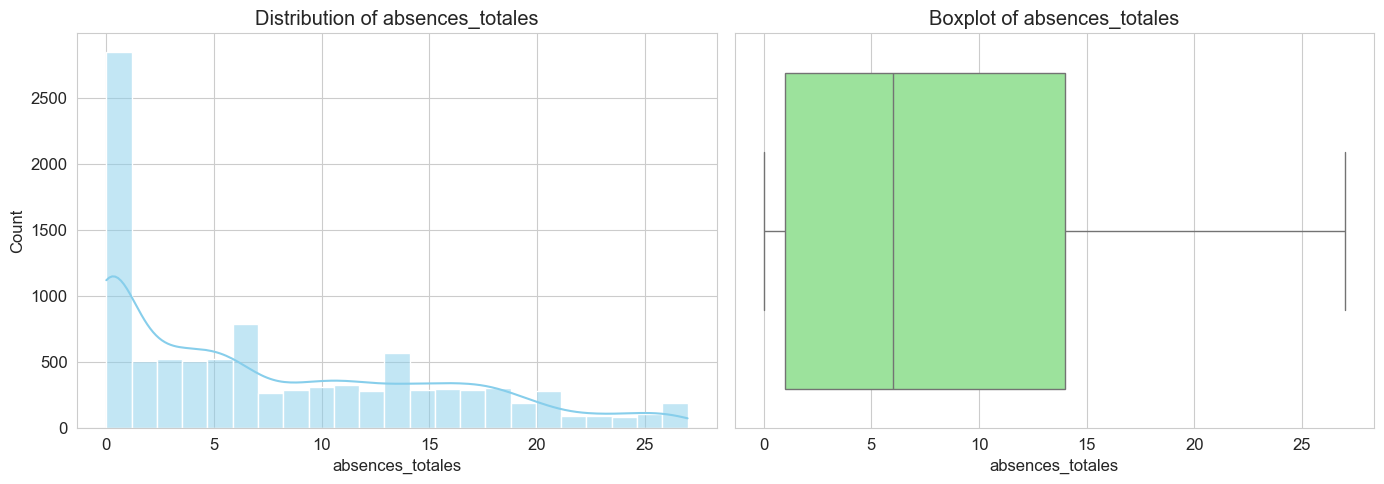

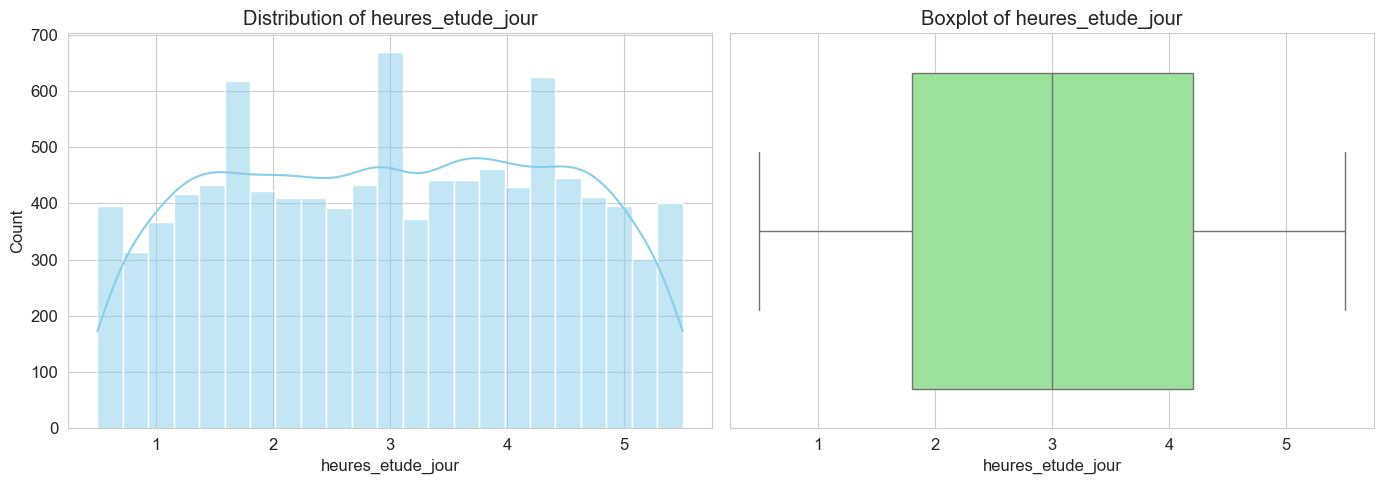

In [4]:
# قائمة المتغيرات الرقمية المهمة التي نريد فحص توزيعها
numerical_features = ['performance_cible', 'moyenne_annuelle', 'age', 'absences_totales', 'heures_etude_jour']

for col in numerical_features:
    if col in df.columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # رسم الهيستوجرام (Histogram)
        sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
        axes[0].set_title(f'Distribution of {col}')
        
        # رسم الصندوق (Boxplot) لكشف القيم الشاذة (Outliers)
        sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
        axes[1].set_title(f'Boxplot of {col}')
        
        plt.tight_layout()
        plt.show()

c:\Users\pc\AppData\Local\Programs\Python\Python314\Lib\site-packages\numpy\lib\_function_base_impl.py:3023: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\pc\AppData\Local\Programs\Python\Python314\Lib\site-packages\numpy\lib\_function_base_impl.py:3024: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


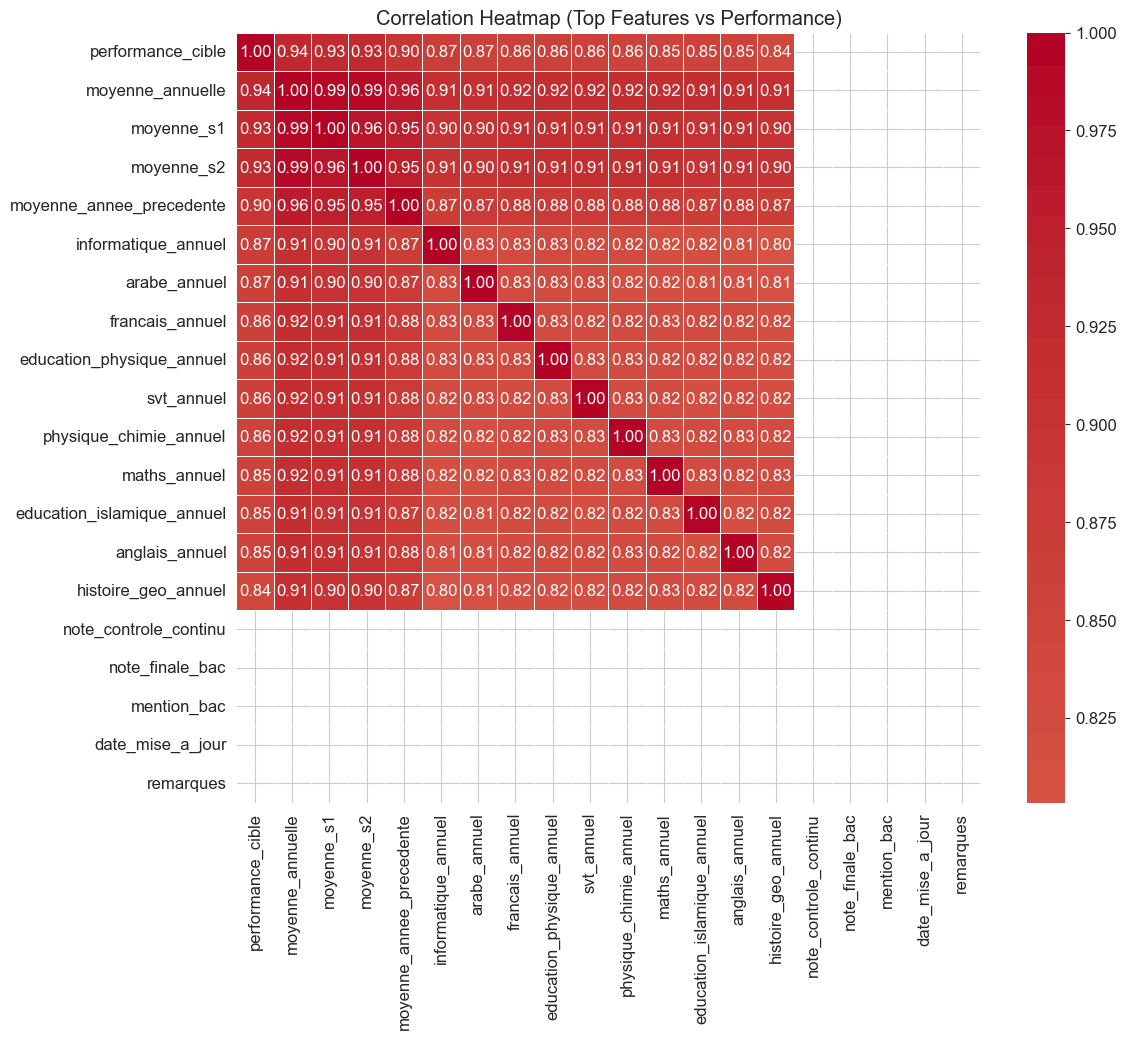

In [5]:
# تحديد الأعمدة الرقمية فقط لحساب الارتباط
numeric_df = df.select_dtypes(include=[np.number])

# لتبسيط الرسم، سنختار أهم الأعمدة فقط (يمكنك إزالة .iloc[...] لرسم كل شيء لكن سيكون مزدحماً)
# سنختار المتغيرات التي لها علاقة أقوى مع performance_cible
correlations = numeric_df.corrwith(df['performance_cible']).sort_values(ascending=False)

# عرض أقوى 15 ارتباطاً إيجابياً وسلبياً
top_features = correlations.index[:15].tolist() + correlations.index[-5:].tolist()
corr_matrix = df[top_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Heatmap (Top Features vs Performance)')
plt.show()

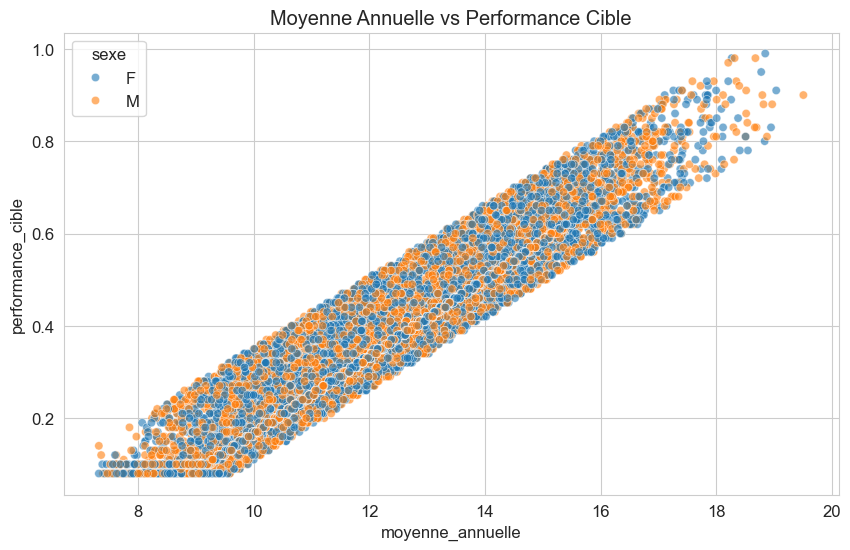

C:\Users\pc\AppData\Local\Temp\ipykernel_16520\3795535627.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette="Set2")


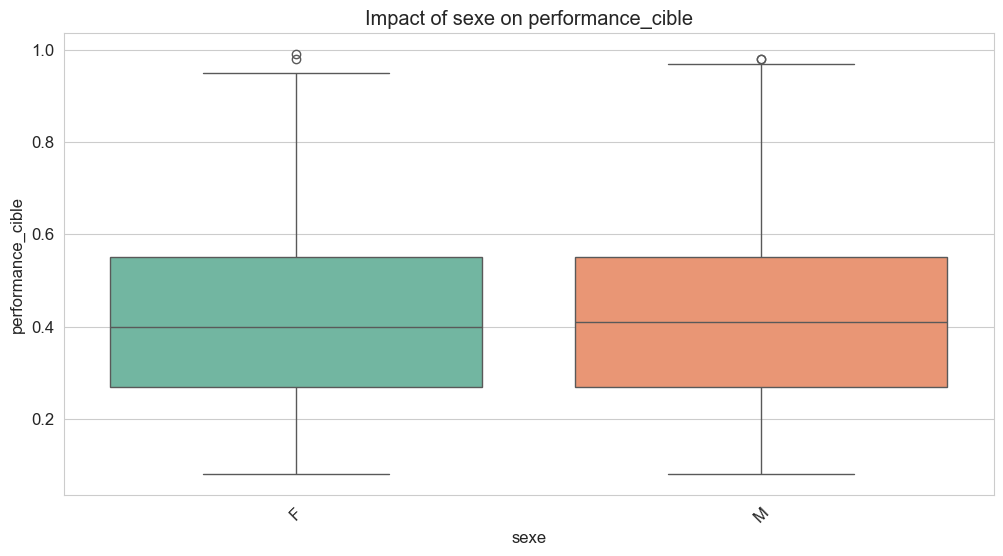

C:\Users\pc\AppData\Local\Temp\ipykernel_16520\3795535627.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette="Set2")


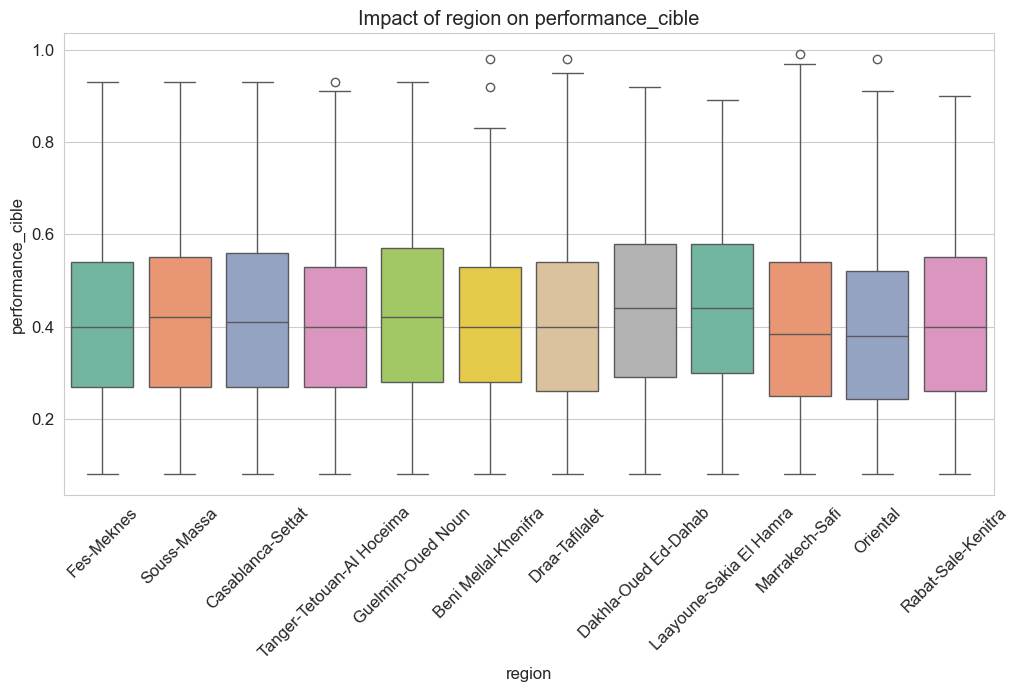

C:\Users\pc\AppData\Local\Temp\ipykernel_16520\3795535627.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y=target, data=df, palette="Set2")


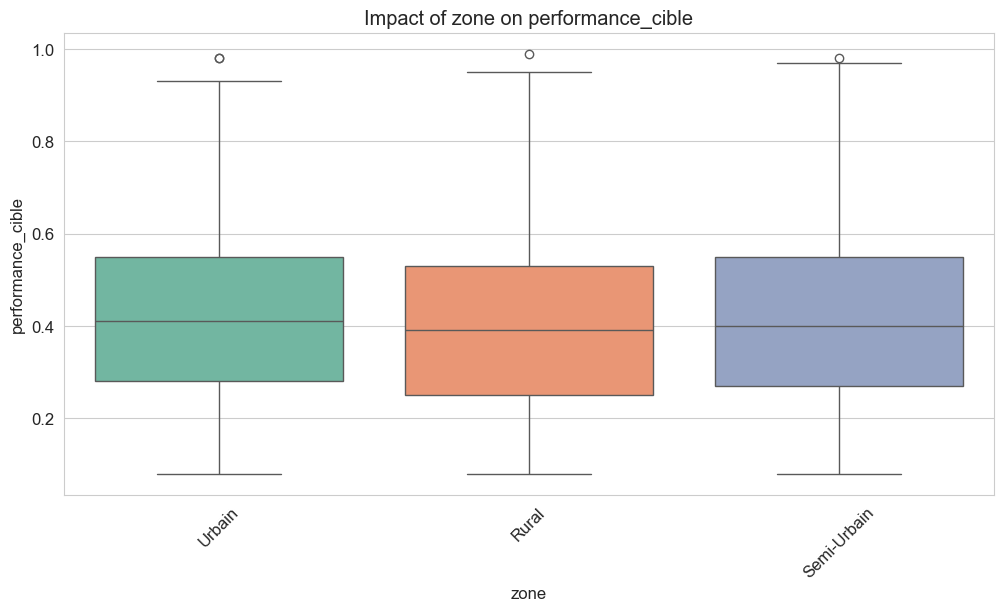

In [6]:
target = 'performance_cible'

# 1. علاقة متغير رقمي مع الهدف (Scatter Plot)
# مثال: المعدل السنوي vs الأداء المستهدف
if 'moyenne_annuelle' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='moyenne_annuelle', y=target, data=df, hue='sexe', alpha=0.6)
    plt.title('Moyenne Annuelle vs Performance Cible')
    plt.show()

# 2. علاقة متغير فئوي مع الهدف (Box Plot)
# سنختار بعض المتغيرات الفئوية (Categorical)
categorical_features = ['sexe', 'region', 'type_etablissement', 'parents_profession'] # تأكد من الأسماء الصحيحة

# رسم تأثير الجنس والمنطقة
features_to_plot = ['sexe', 'region', 'milieu_residence'] # تأكد أن الأسماء مطابقة لبياناتك (مثلاً 'zone' أو 'milieu')

for col in ['sexe', 'region', 'zone']: # استخدمت 'zone' بناءً على البيانات التي رأيتها سابقاً
    if col in df.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=col, y=target, data=df, palette="Set2")
        plt.title(f'Impact of {col} on {target}')
        plt.xticks(rotation=45)
        plt.show()